In [39]:
import pandas as pd
import matplotlib
import numpy as np
import os

%matplotlib notebook
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize']=[10,6]
pd.options.display.width = 0
pd.set_option('display.max_columns', None)

In [72]:
%matplotlib notebook

In [60]:
data_path = 'bench_results.csv'
max_rt_ratio = 0.8
min_rt_seg_ratio = 1

In [61]:
print(f'Every finished run with Realtime Duration Ratio less than {max_rt_ratio} and Realtime Segments Ratio above {min_rt_seg_ratio} is accounted when calculating Max Session Count.')

Every finished run with Realtime Duration Ratio less than 0.8 and Realtime Segments Ratio above 1 is accounted when calculating Max Session Count.


In [139]:
data = pd.read_csv(data_path)
# mem to mb
# top ram format reading errors fixes
data.max_ram = data.max_ram / 1024**3
data.loc[data.max_ram<1, 'max_ram'] = data.max_ram[data.max_ram<1]*1024

data.max_vram = data.max_vram / 1024**2
data['ok'] = np.logical_and(data.rt_dur_ratio<max_rt_ratio,data.rt_seg_ratio>=min_rt_seg_ratio)
data_nice = data[np.logical_and(data.rt_dur_ratio<max_rt_ratio,data.rt_seg_ratio>=min_rt_seg_ratio)]

<IPython.core.display.Javascript object>


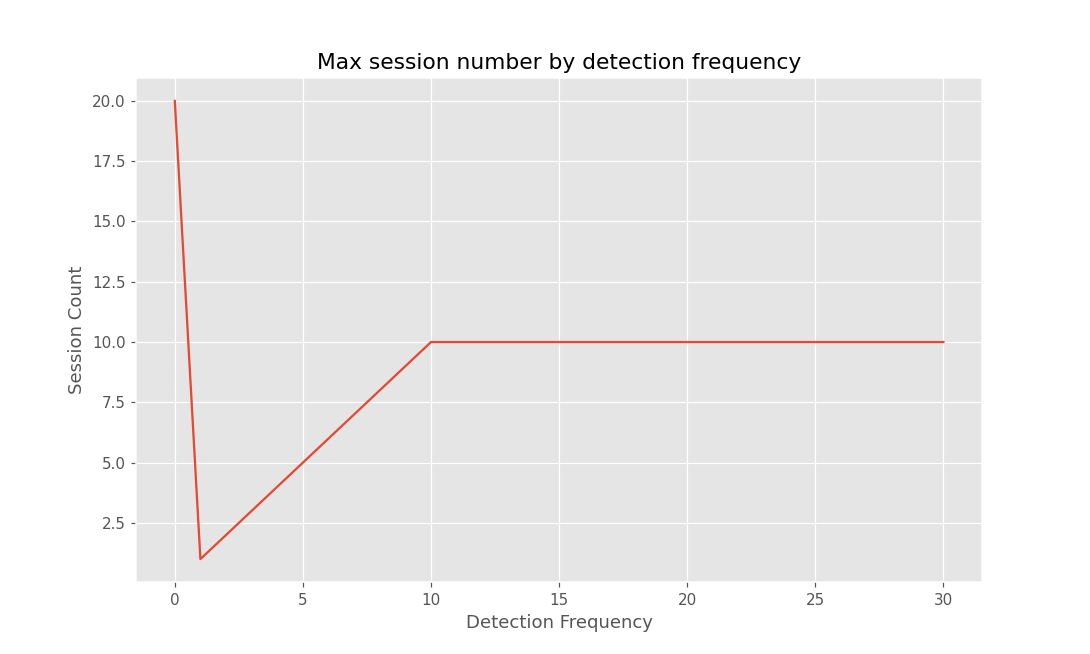

<AxesSubplot:title={'center':'Max session number by detection frequency'}, xlabel='Detection Frequency', ylabel='Session Count'>

In [78]:
data_nice.sess_count.groupby(data_nice.detect_freq).max().plot(ylabel='Session Count', xlabel='Detection Frequency', title='Max session number by detection frequency')

In [183]:
data_pivoted = data.pivot(index='detect_freq', columns='sess_count')
def draw_ok(series, plt):
    for s in series:
        markers=np.where(data_pivoted.ok[s], '#00AA00', '#FF0000')
        plt.scatter(x = series[s].index, y=series[s], c=markers)

<IPython.core.display.Javascript object>


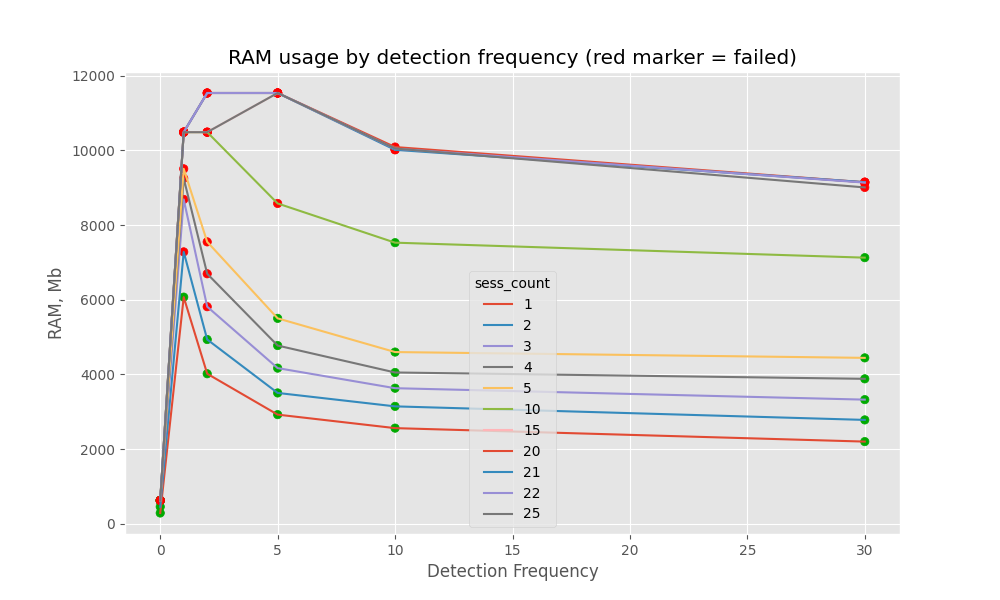

In [184]:
plt = data_pivoted.max_ram.plot(ylabel='RAM, Mb', xlabel='Detection Frequency', title='RAM usage by detection frequency (red marker = failed)')
draw_ok(data_pivoted.max_ram, plt)

<IPython.core.display.Javascript object>


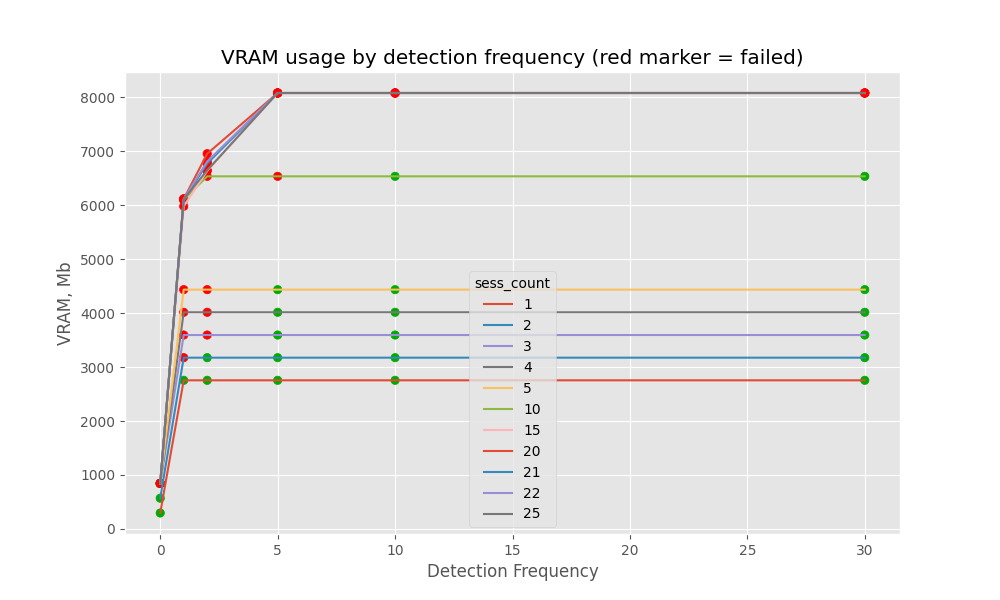

In [186]:
plt = data_pivoted.max_vram.plot(ylabel='VRAM, Mb', xlabel='Detection Frequency', title='VRAM usage by detection frequency (red marker = failed)')
draw_ok(data_pivoted.max_vram, plt)